# Google Play Store Apps
### Complete Exploratory Data Analysis (EDA)

## Description

## About Dataset

**Context**: While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

**Content**: Each app (row) has values for catergory, rating, size, and more.

**Acknowledgements**: This information is scraped from the Google Play Store. This app information would not be available without it.

**Inspiration**: The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Data Loading and Exploration

In [2]:
# Set dataset path
DATA_PATH = './data/googleplaystore.csv'

In [3]:
# Read dataset
df = pd.read_csv(DATA_PATH)

In [4]:
# Toggle option to view max rows and columns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [5]:
# View top 5 rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Columns of the dataset
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
# Number of rows and columns
print(f"The number of rows in this dataset is {df.shape[0]}, and the number of columns is {df.shape[1]}.")

The number of rows in this dataset is 10841, and the number of columns is 13.


In [8]:
# Information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [9]:
# Statistical description of numerical columns
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


**Observation:**

- There are some missing values in some of the columns.
- Some columns are of invalid data types like:
  - `Size`
  - `Installs`
  - `Price`

In [10]:
# Number of missing values
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [11]:
# Print out missing values percentage for each column

for column in df.columns:
    missing_values = df[column].isnull().sum()
    
    total_values = df.shape[0]
    
    percentage_missing = (missing_values / total_values) * 100
    
    print(f"{column}: {percentage_missing:.2f}%")

App: 0.00%
Category: 0.01%
Rating: 13.60%
Reviews: 0.00%
Size: 0.00%
Installs: 0.00%
Type: 0.01%
Price: 0.00%
Content Rating: 0.00%
Genres: 0.01%
Last Updated: 0.00%
Current Ver: 0.07%
Android Ver: 0.02%


**Observation:**
- `Rating` has the most number of missing values, 13.60%.

### Data Cleaning

In [12]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### `Size`

In [13]:
# View the data type of the Size column
df['Size'].dtype

dtype('O')

In [14]:
# Number of null values in the Size column
df['Size'].isnull().sum()

0

**Observation:**
- There are no missing values in the `Size` column.

In [15]:
# Top 10 most-appearing values in the Size column
df['Size'].value_counts().sort_values(ascending=False).head(10)

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
Name: count, dtype: int64

In [16]:
# Number of unique values in the Size column
df['Size'].nunique()

461

In [17]:
# Unique values in the Size column
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [18]:
# Total number of values having 'M'
print(f"Total number of values having 'M': {df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()}")

# Total number of values having 'k'
print(f"Total number of values having 'k': {df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()}")

# Total number of values having 'Varies with device'
print(f"Total number of values having 'Varies with device': {df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()}")

Total number of values having 'M': 8830
Total number of values having 'k': 316
Total number of values having 'Varies with device': 1695


If their sum is equal to the length of the dataset, it means we only have these 3 types of values in the `Size` column.

In [19]:
print((8830+316+1695) == len(df))

True


**Observation:**
- There are 3 types of values in the Size column:
  1. Varies with device
  2. ##M (Represnting Mb)
  3. ##k (Represnting Kb)

In [20]:
# Define a function to convert the size into bytes
def convert_size_tobytes(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', "")) * 1024 * 1024
        elif 'k' in size:
            return float(size.replace('k', "")) * 1024
        elif 'Varies with device' in size:
            return np.nan
        
    return size

In [21]:
# Make a new column and convert the size in bytes
df['Size_in_bytes'] = df['Size'].apply(convert_size_tobytes)

In [22]:
# Check whether it has converted successfully
df['Size_in_bytes']

0        19922944.0
1        14680064.0
2         9122611.2
3        26214400.0
4         2936012.8
            ...    
10836    55574528.0
10837     3774873.6
10838     9961472.0
10839           NaN
10840    19922944.0
Name: Size_in_bytes, Length: 10841, dtype: float64

In [23]:
# Drop the raw Size column
df.drop('Size', axis=1, inplace=True)

In [24]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_bytes
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19922944.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14680064.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,9122611.2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,26214400.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2936012.8


In [25]:
# Make a new column and convert the bytes into Mb
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

In [26]:
df['Size_in_Mb']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size_in_Mb, Length: 10841, dtype: float64

We can now drop the Size_in_bytes column.

In [27]:
df.drop("Size_in_bytes", axis=1, inplace=True)

#### `Installs`

In [28]:
# View the Installs column
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10841, dtype: object

In [29]:
df['Installs'].dtype

dtype('O')

In [30]:
# View unique values in the Installs column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [31]:
# Number of missing values in the Installs column
df['Installs'].isnull().sum()

0

**Observation**
- There are + and , in the values of the `Installs` column.
- There are no missing values in the `Installs` column.
- `Installs` has an object data type because it has string values.

We will have to remove `+` and `,` from the values in the `Installs` column and convert it into the integer data type.

In [32]:
# Uses lambda functions to remove + and , from the values in the Installs column
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)

In [33]:
# Use lambda function to convert all the values in the Installs column to integer
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [34]:
# View the data tye of the Installs column after converting
df['Installs'].dtype

dtype('int64')

In [35]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

We can create a new column based on values of the `Installs` column.

In [36]:
# Print the min, max and median values
print(f"Min: {df['Installs'].min()}")
print(f"Median: {df['Installs'].median()}")
print(f"Max: {df['Installs'].max()}")


Min: 0
Median: 100000.0
Max: 1000000000


In [37]:
# Make a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [38]:
df['Installs_category'].value_counts()

Installs_category
Low                   2162
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

There, we have successfully created a column having install categories.

In [39]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


#### `Price`

In [40]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

**Observation:**
- The `Price` column has an object data type because it has string values.
- The values in the `Price` column are only in dollars $.

To handle this, we will remove the `$` signs and convert it to a float data type.

In [41]:
# Uses a lambda fuction to remove $ signs
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)

In [42]:
# Change the data type of the Price column to float
df['Price'] = df['Price'].apply(lambda x: float(x))

In [43]:
# View the the data type of the Price column after converting
df['Price'].dtype

dtype('float64')

In [44]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


### Dealing with the missing values

In [45]:
# Number of missing values in the dataset
df.isnull().sum().sort_values(ascending=False)

Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Category                1
Type                    1
Genres                  1
App                     0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_category       0
dtype: int64

In [46]:
# Percentage of missing values in each column
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Size_in_Mb           15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Category              0.009224
Type                  0.009224
Genres                0.009224
App                   0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Content Rating        0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

**Observations:**
- We have 1695 missing values in the `Size_in_bytes` column, which is 15.6% of the total values in the column.
- We have 1474 missing values in the `Rating` column, which is 13.6% of the total values in the column.
- We have 8 missing value in the `Current Ver` column, which is 0.07% of the total values in the column.
- We have 2 missing values in the `Android Ver` column, which is 0.01% of the total values in the column.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is 0.009% of the total values in the column.

In [47]:
# The total number of missing values the data
df.isnull().sum().sum()

3182

Let's plot the missing values.

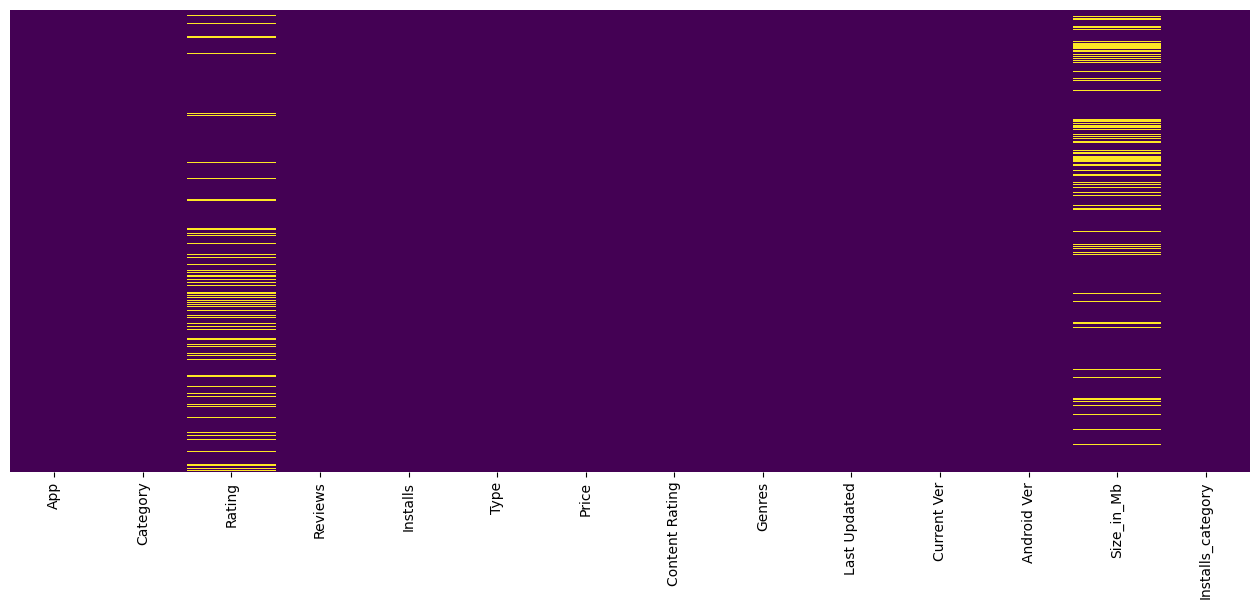

In [48]:
# Plot the number of missing values using heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

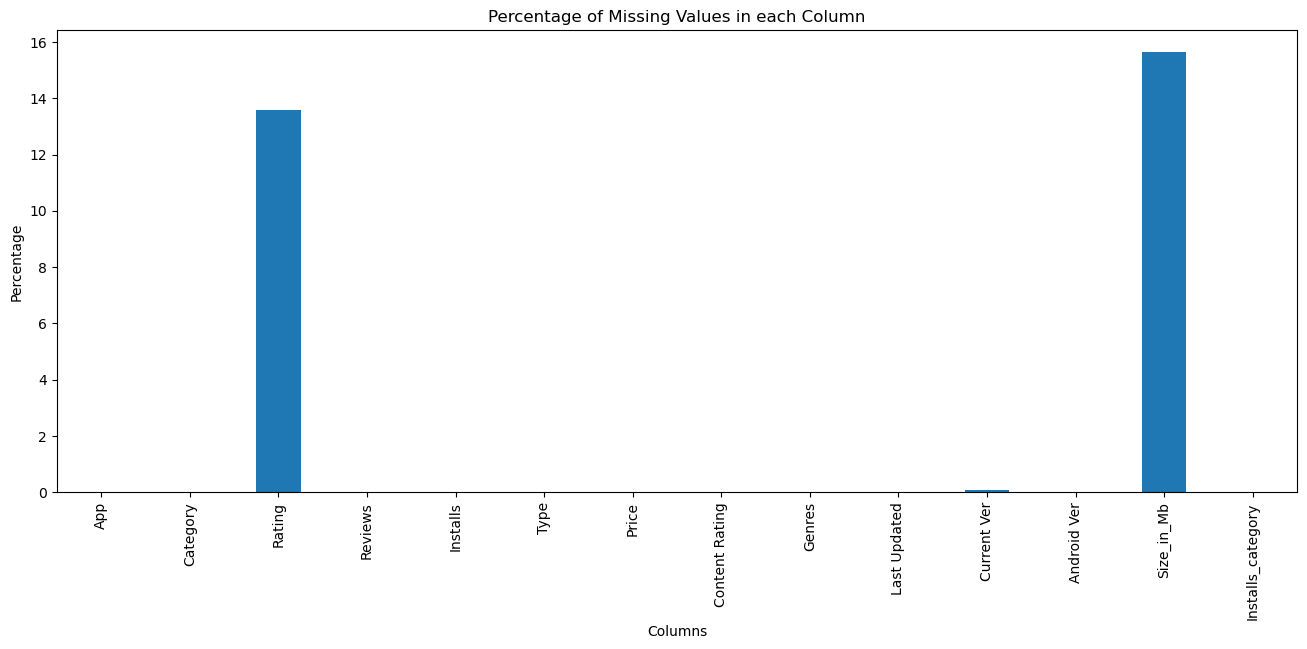

In [49]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

Let's plot the missing values other than `Rating` and `Size_in_Mb` column. We have missing percentage columns other than rating having less than one percent of missing values, we will plot them as follows:

Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating column')

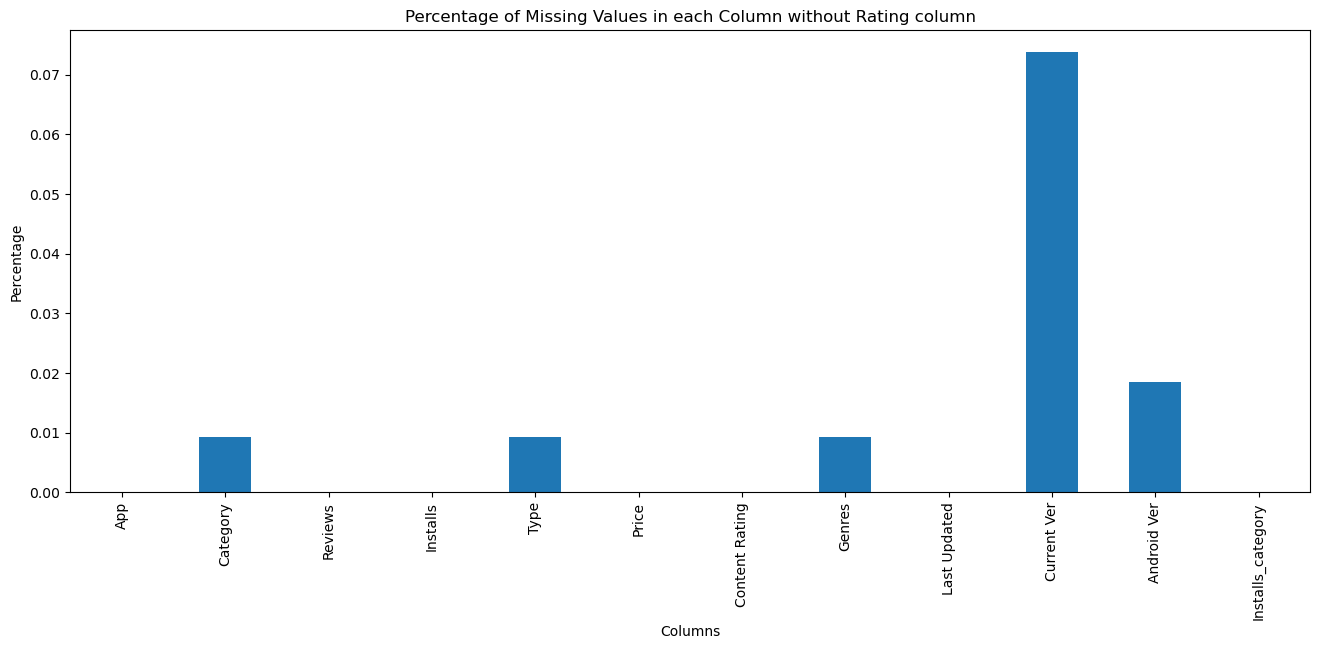

In [50]:
plt.figure(figsize=(16, 6)) # make figure size
missing_percentage[missing_percentage < 1].plot(kind='bar') # plot the null values by their percentage in each column
plt.xlabel('Columns') # add the x-axis labels
plt.ylabel('Percentage') # add the labels for y-axis
plt.title('Percentage of Missing Values in each Column without Rating column')  # add the title for the plot

We can not impute the `Rating` column as is is directly linked with the `Installs` column. To test this Hypothesis we'll need to plot the `Rating` column with the `Installs` and Size columns and statistically test it using pearson correlation test.

In [51]:
# The numerical columns
df.describe()

,Rating,Reviews,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,100.000000


<Axes: >

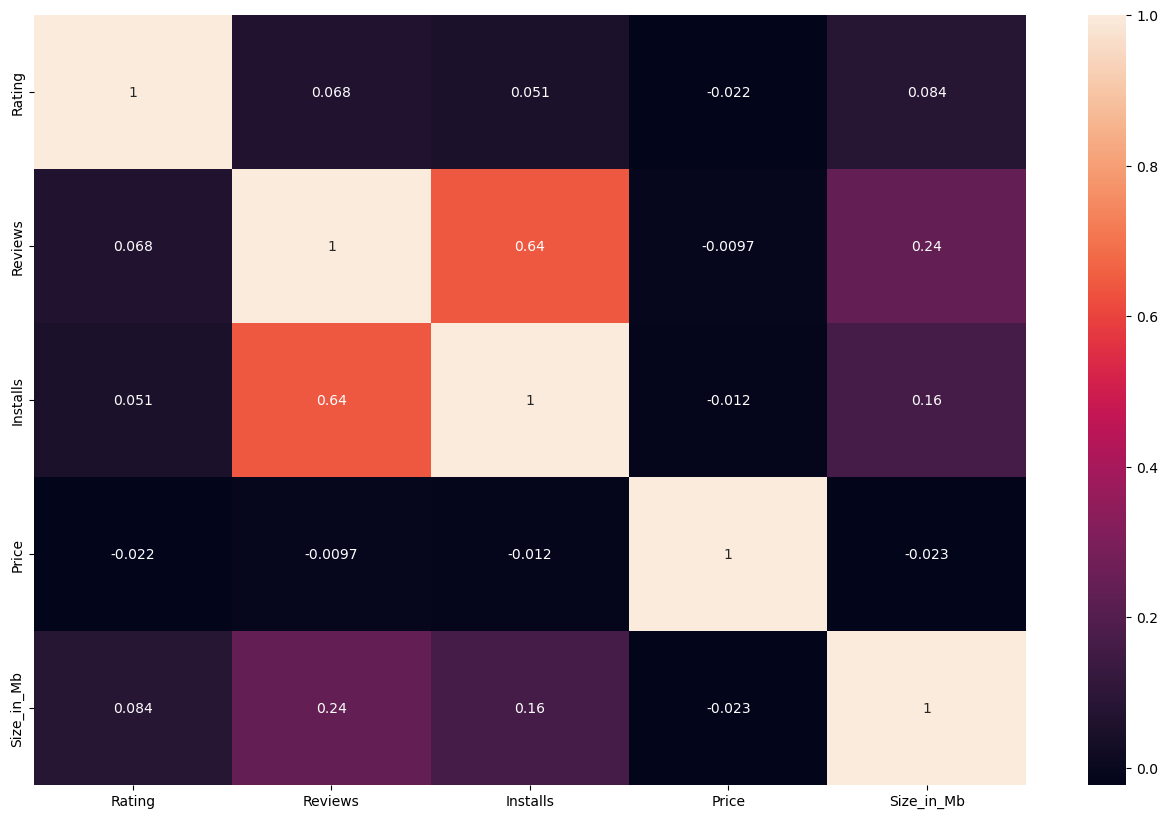

In [52]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10)) # make figure size  
numeric_cols = ['Rating', 'Reviews', 'Installs', 'Price', 'Size_in_Mb'] # make a list of numeric columns
sns.heatmap(df[numeric_cols].corr(), annot=True) # plot the correlation matrix

In [53]:
df[numeric_cols].corr() # this will show the correlation matrix

,Rating,Reviews,Installs,Price,Size_in_Mb
Rating,1.000000,0.068147,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.643123,-0.009666,0.238218
Installs,0.051393,0.643123,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.011688,1.000000,-0.023000
Size_in_Mb,0.084098,0.238218,0.164794,-0.023000,1.000000


In [54]:
# we can calculate the pearson correlation coefficient using scipy as well as follows

from scipy import stats

# remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")


Pearson's R between Reviews and Installs: 0.6262


**Observations:**
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is `0.64` according to corr(). Which is quite good.
   - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
     - If we have an ap with `2` installs and we imputer the reviews with `1000` or via average reviews then it will be wrong.
- Installs is slightly correlated with `Size_in_Mb`, which is `0.16`, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.

Before going ahead, let's remove the rows with missing values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns, as they are very less in number and will not affect our analysis.

In [55]:
# Length before removing null values
print(f"Length of the data before removing null values: {len(df)}")

Length of the data before removing null values: 10841


In [56]:
# Remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [57]:
# Length after removing null values
print(f"Length of the data after removing null values: {len(df)}")

Length of the data after removing null values: 10829


We have removed `12` rows having null values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns.

In [58]:
# Let's check the null values again
df.isnull().sum().sort_values(ascending=False)

Size_in_Mb           1694
Rating               1469
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

**Observations**
- Only `Rating` and `Size_in_Mb` columns are left with missing values.
     - We know that we have to be carefull while deadling with `Rating` column, as it is directly linked with the `Installs` column.
     - In `Size` columns we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.

In [59]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size_in_Mb', 'Installs_category'],
      dtype='object')

In [60]:
# Use groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [61]:
df['Rating'].isnull().sum()

1469

Let's replace the respective missing values of `Rating`, with respect to the average given in each `Installs_category`.

In [62]:
# In which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
Low                   880
Very low              453
Moderate               88
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

In [63]:
# Check the average ratings for each category
df.groupby('Installs_category')['Rating'].mean()

Installs_category
no                         NaN
Very low              4.637037
Low                   4.170970
Moderate              4.035417
More than moderate    4.093255
High                  4.207525
Very High             4.287076
Top Notch             4.374396
Name: Rating, dtype: float64

In [64]:
# Print the min, average and max values in the Rating column
print(df['Rating'].min())
print(df['Rating'].mean())
print(df['Rating'].max())

1.0
4.191837606837606
5.0


In [65]:
# Step 1: Calculate the average ratings by 'Installs_category'
avg_ratings = df.groupby('Installs_category')['Rating'].mean()

# Step 2: Fill missing values in the 'Rating' column for the 'no' category with 0
# We use a lambda function to check if the 'Installs_category' is 'no' and the 'Rating' is missing (NaN)
# If the condition is met, we fill the missing value with 0
df['Rating'] = df.apply(lambda x: 0 if pd.isna(x['Rating']) and x['Installs_category'] == 'no' else x['Rating'], axis=1)

# Step 3: Fill any remaining missing values in the 'Rating' column with the respective 'Installs_category' mean
# This ensures that missing ratings are replaced with the average rating for their respective 'Installs_category'
df['Rating'] = df['Rating'].fillna(df['Installs_category'].map(avg_ratings))

In [66]:
# To check whether they have been replaced sucessfully
df.isnull().sum()

App                     0
Category                0
Rating                  0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Size_in_Mb           1694
Installs_category       0
dtype: int64

Let's check if there is any similar link with `Reviews` column as well.

In [67]:
# In which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

There are no missing values in `Reviews`.

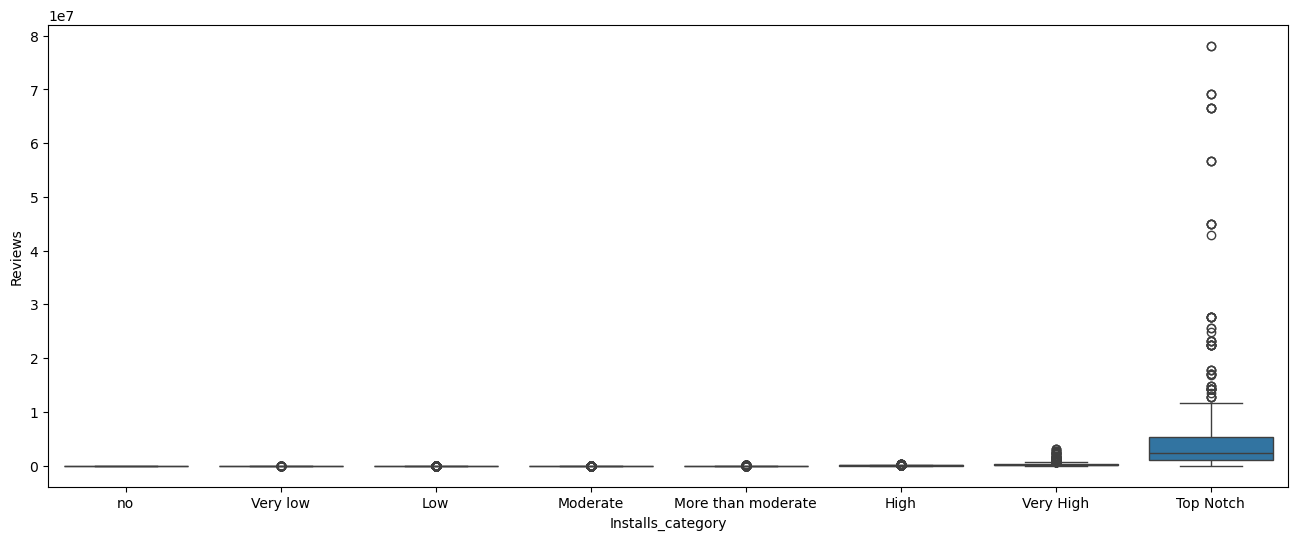

In [68]:
# Let's plot a box plot for Reviews column
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= 'Reviews', data=df); # plot the box plot

Let's normalize the data using log transformation to visualize it better.

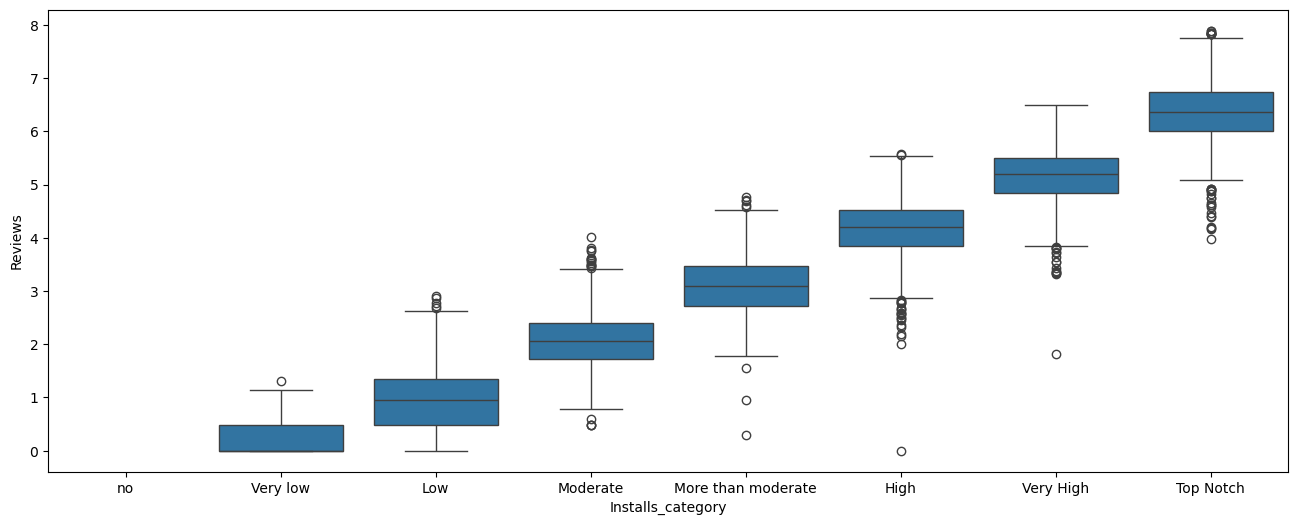

In [69]:
# Plot a box plot for Reviews column
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= np.log10(df['Reviews']), data=df); # plot the box plot using the log10 of Reviews

We can also draw the scatter plot of the `Rating` and `Review` columns with the `Installs` column.

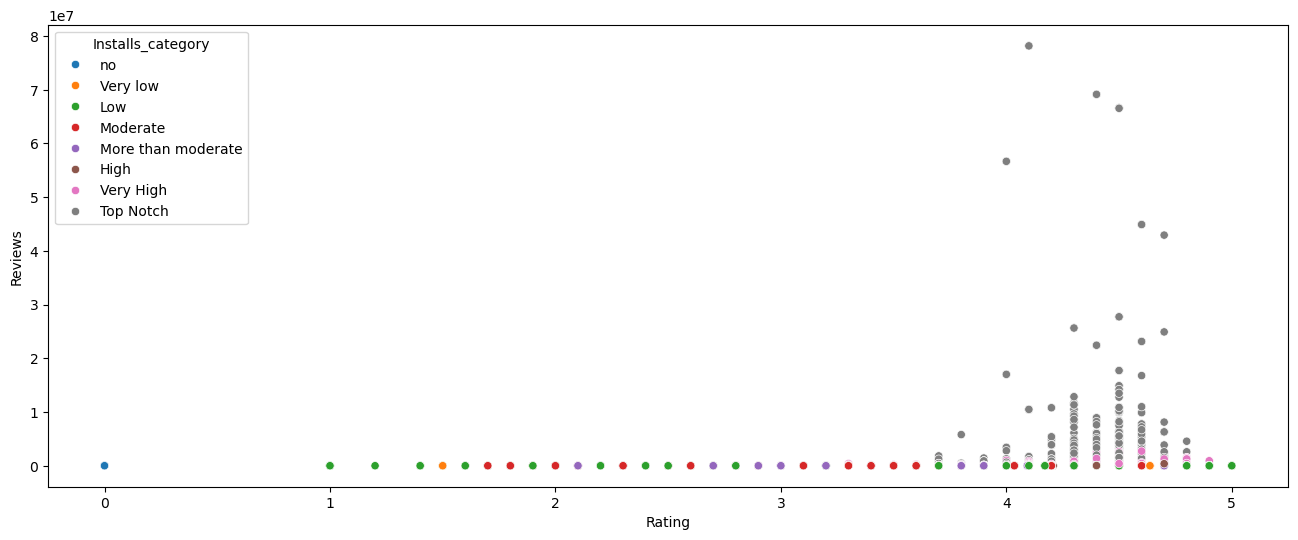

In [70]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df); # plot the scatter plot

It doesn't show any trend because `Rating` is a categorical variable (or ordinal) and `Reviews` is a continuous variable; thus, we can't plot them together. Let's try reviews and `Installs`.

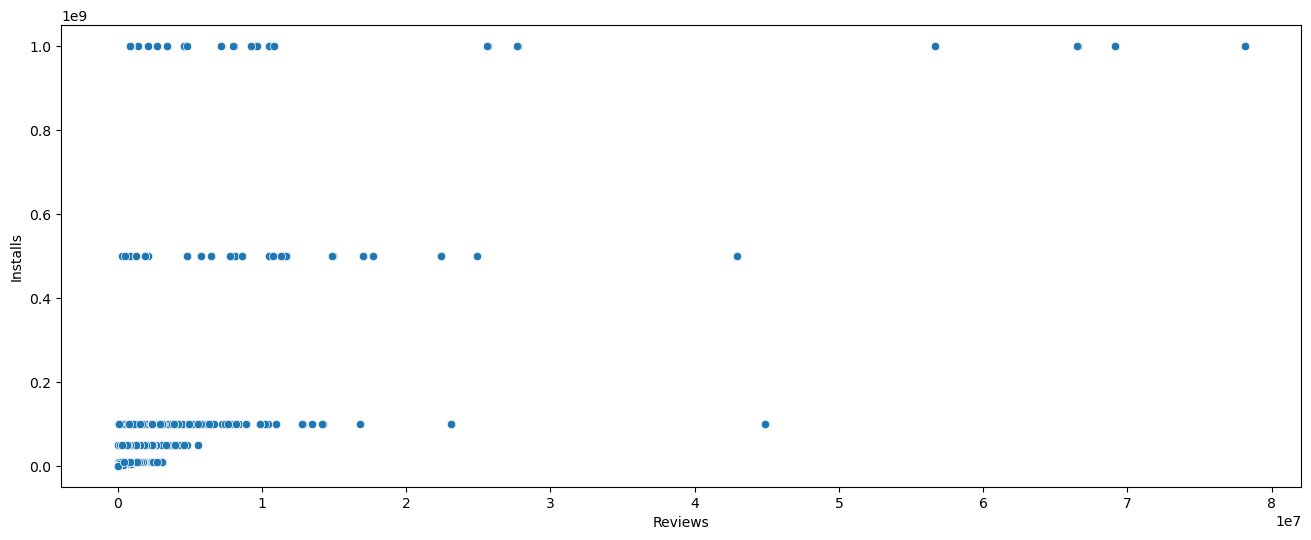

In [71]:
# Plot Reviews and Installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=df); # plot the scatter plot

We didn't see any trends, and the problem is that we need to normalize the data before plotting it; let's try log transformation.

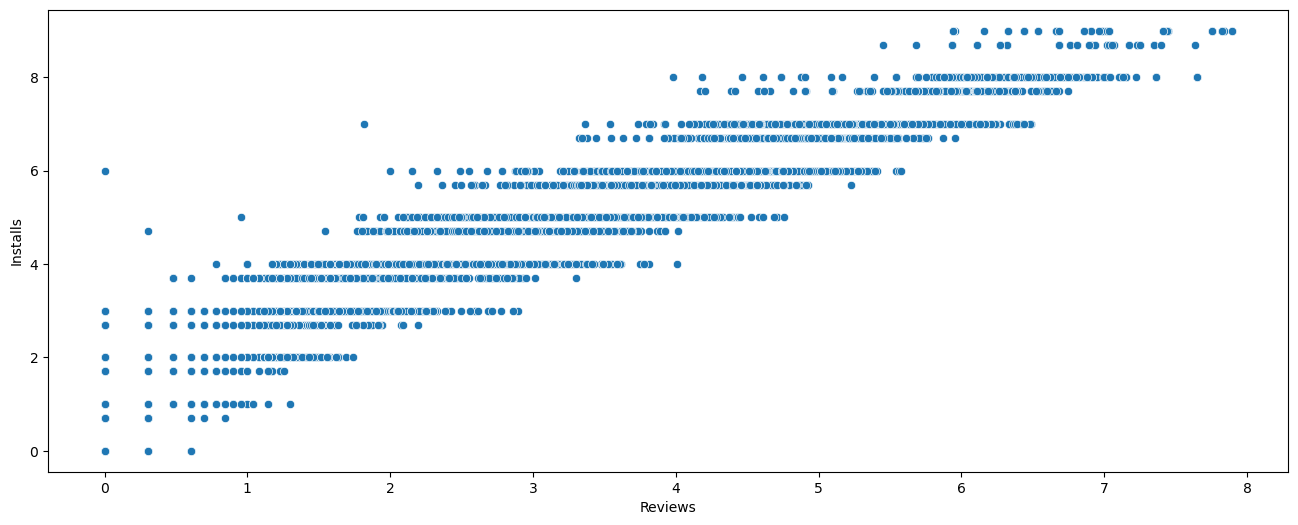

In [72]:
# Plot Reviews and Installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df); # plot the scatter plot

Now we see a slight trend, but the issue is that `Installs` were given in a factorial manner, such as `10+`, `20+`, `1000+`, and so on, and these are not continuous numbers but discrete ones, so we can only see a slight trend here. To see the trend, let's plot a line plot.

<Figure size 1600x600 with 0 Axes>

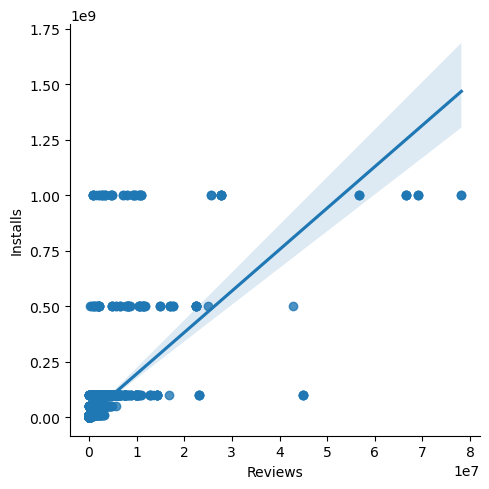

In [73]:
# Plot Reviews and Installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df); # plot the scatter plot with trend line

Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

**Observations:**
- We can see that most of the null values from `Rating` column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less rating and review.

Let's now check the duplicates.

### Duplicates

- Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
- If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis.
- Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points.
- It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.

In [74]:
# To find the number of duplicates
df.duplicated().sum()

483

We should also check for duplicates based on the app name, as every app should have a unique name.

In [75]:
# Find duplicate in the App column
df['App'].duplicated().sum()

1181

App names should be unique, but we have some duplicates.

Let's check for the number of duplicates in each column using a for loop and print the output.

In [76]:
# Let's check for number of duplicates
for col in df.columns:
    print(f"{col}: {df[col].duplicated().sum()}")

App: 1181
Category: 10796
Rating: 10784
Reviews: 4830
Installs: 10809
Type: 10827
Price: 10737
Content Rating: 10823
Genres: 10710
Last Updated: 9453
Current Ver: 7998
Android Ver: 10796
Size_in_Mb: 10373
Installs_category: 10821


This means that the only better way to find duplicates is to check for whole data.

In [77]:
# Print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


Let's check the duplicate rows.

In [78]:
# Show the duplicates
df[df['App'].duplicated(keep=False)].sort_values(by='App').head(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.8,High
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.8,High
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.0,High
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.0,High
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.8,Low
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.8,Low
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.0,More than moderate
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.0,More than moderate
3083,365Scores - Live Scores,SPORTS,4.6,666521,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.0,Very High
5415,365Scores - Live Scores,SPORTS,4.6,666246,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.0,Very High


Let's remove the duplicates now.

In [79]:
# Remove the duplicates
df.drop_duplicates(inplace=True)

In [80]:
# Print the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10346


We have removed `483` duplicate rows from the dataset, and now we have `10346` rows.

### Insights from the Data

#### 1. Which category has the highest number of apps?

In [81]:
# Which category has highest number of apps
df['Category'].value_counts().head(10) # this will show the top 10 categories with highest number of apps

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

To plot this we can use a bor plot.

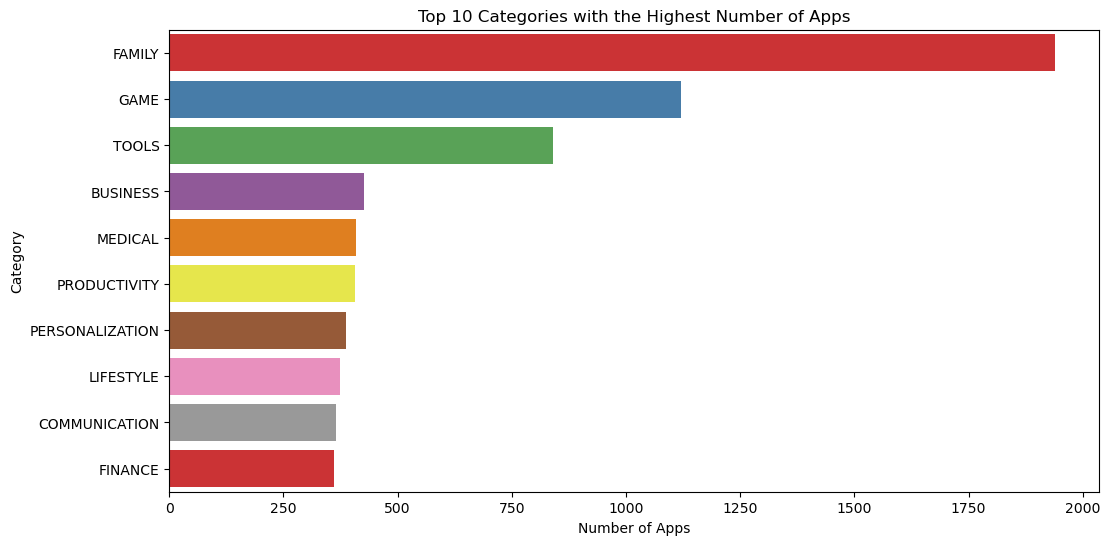

In [82]:
top_10_categories = df['Category'].value_counts().head(10)

# Plot a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette="Set1")

# Customize the plot
plt.title('Top 10 Categories with the Highest Number of Apps')
plt.xlabel('Number of Apps')
plt.ylabel('Category');

#### 2. Which category has the highest number of installs?

In [83]:
# Category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

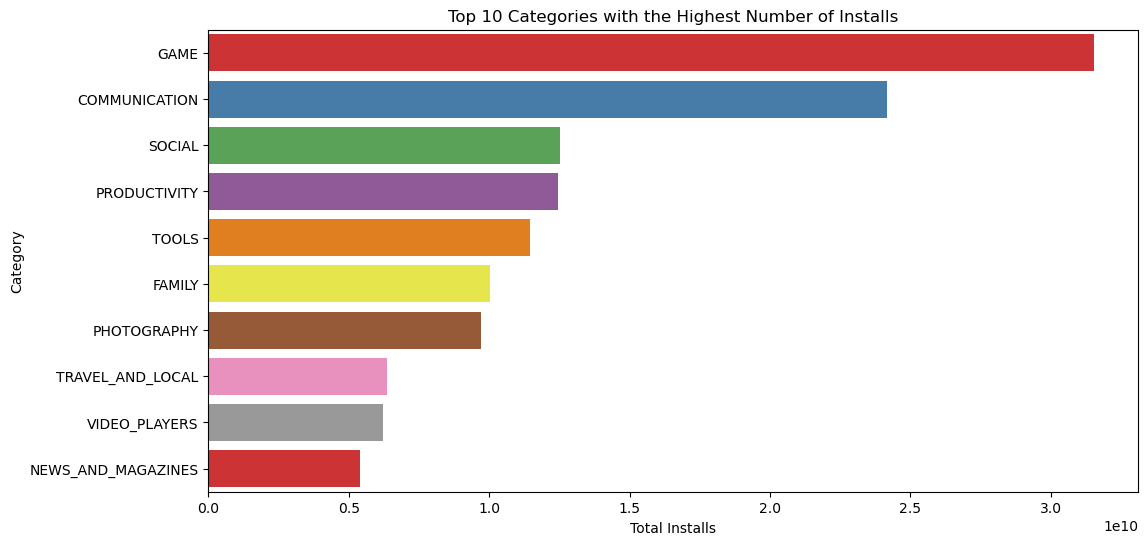

In [84]:
top_10_categories_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

# Plot a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=top_10_categories_installs.values, y=top_10_categories_installs.index, palette="Set1")

# Customize the plot
plt.title('Top 10 Categories with the Highest Number of Installs')
plt.xlabel('Total Installs')
plt.ylabel('Category');

#### 3. Which category has the highest number of reviews?

In [85]:
# Categories with highest number of Reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

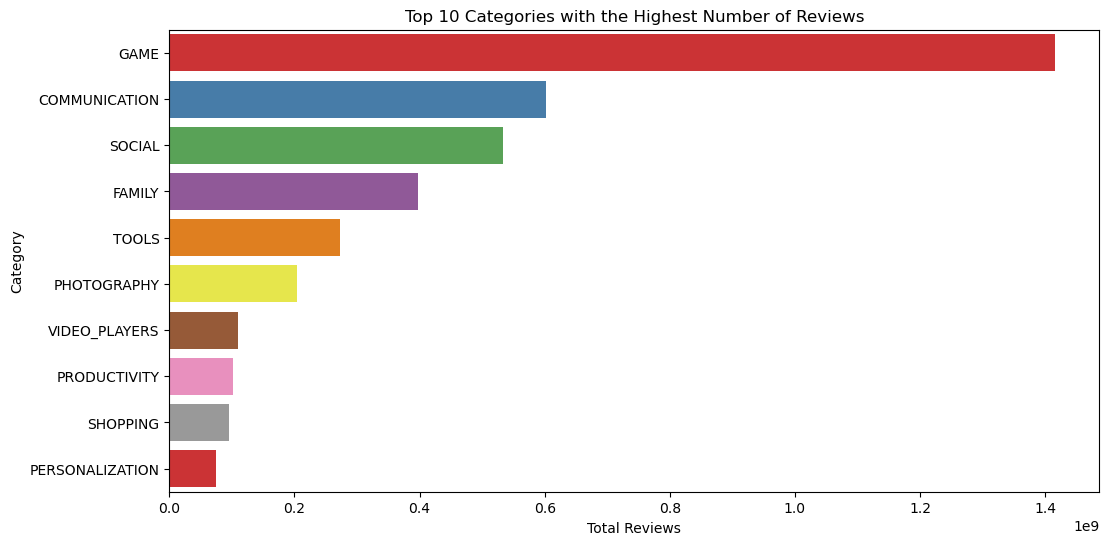

In [86]:
top_10_categories_reviews = df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

# Plot a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=top_10_categories_reviews.values, y=top_10_categories_reviews.index, palette="Set1")

# Customize the plot
plt.title('Top 10 Categories with the Highest Number of Reviews')
plt.xlabel('Total Reviews')
plt.ylabel('Category');

#### 4. What is the distribution of app ratings?

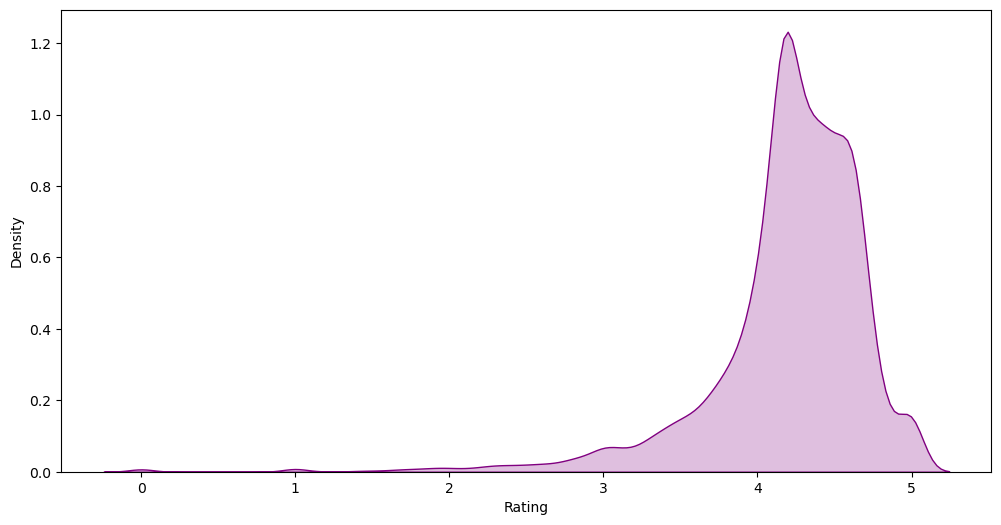

In [87]:
# plot the Ratings distribution
plt.figure(figsize=(12, 6)) # Set figure size
sns.kdeplot(df['Rating'], color="purple", shade=True); # plot the distribution plot

#### 5. How many apps in the dataset are free, and how many are paid?

In [88]:
df.Type.value_counts()

Type
Free    9584
Paid     762
Name: count, dtype: int64

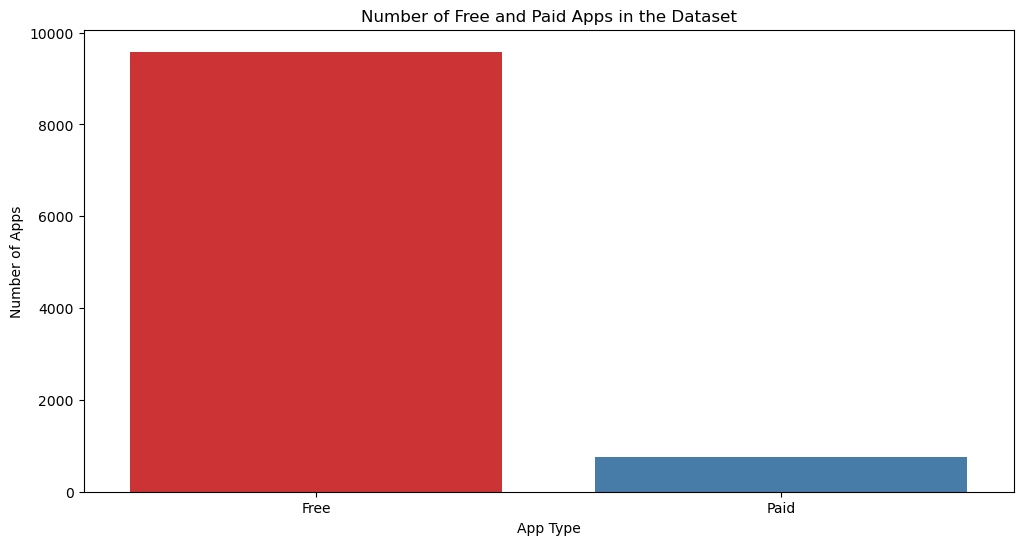

In [89]:
# Count the number of free and paid apps
type_counts = df['Type'].value_counts()

# Plot a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=type_counts.index, y=type_counts.values, palette="Set1")

# Customize the plot
plt.xlabel("App Type")
plt.ylabel("Number of Apps")
plt.title("Number of Free and Paid Apps in the Dataset");

Let's also plot the percentage.

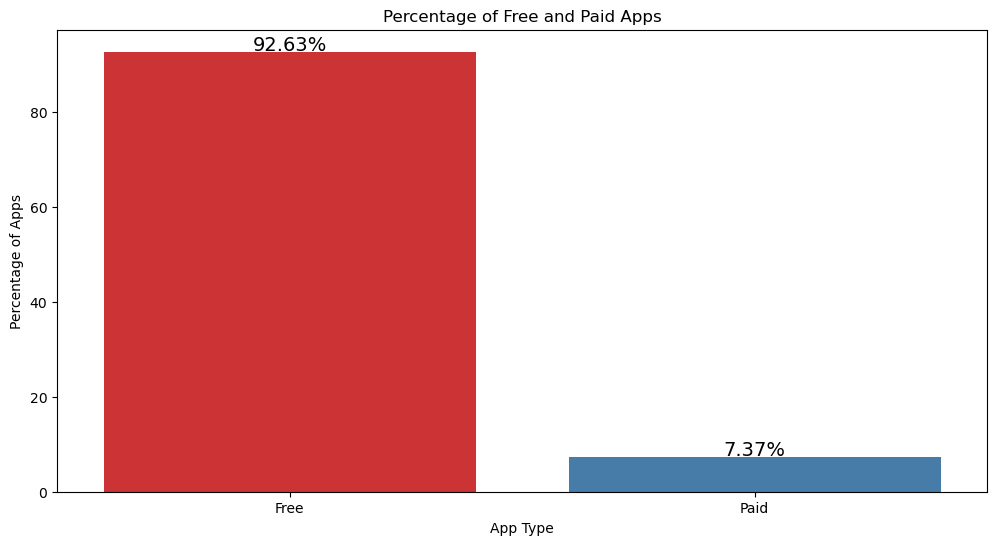

In [90]:
# Calculate the percentages
type_percentages = (type_counts / type_counts.sum()) * 100

# Plot a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Create a bar plot
ax = sns.barplot(x=type_percentages.index, y=type_percentages.values, palette="Set1")

# Adding percentage labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

# Customize the plot
plt.xlabel("App Type")
plt.ylabel("Percentage of Apps")
plt.title("Percentage of Free and Paid Apps");

#### 6. What is the price range for paid apps, and what are the most expensive apps?

In [91]:
# Check the price range of paid apps
paid_apps = df[df['Type'] == 'Paid']

# Print the min and max prices
print(f"Minimum price of paid app: {paid_apps['Price'].min()}")
print(f"Maximum price of paid app: {paid_apps['Price'].max()}")

Minimum price of paid app: 0.99
Maximum price of paid app: 400.0


In [92]:
# View top 10 most expensive paid apps
paid_apps[['App','Price','Installs', 'Rating', 'Reviews']].sort_values(by='Price', ascending=False).head(10)

,App,Price,Installs,Rating,Reviews
4367,I'm Rich - Trump Edition,400.00,10000,3.6,275
4197,most expensive app (H),399.99,100,4.3,6
5359,I am rich(premium),399.99,5000,3.5,472
5362,I Am Rich Pro,399.99,5000,4.4,201
5351,I am rich,399.99,100000,3.8,3547
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,399.99,0,0.0,0
5354,I am Rich Plus,399.99,10000,4.0,856
5364,I am rich (Most expensive app),399.99,1000,4.1,129
4362,💎 I'm rich,399.99,10000,3.8,718
5358,I am Rich!,399.99,1000,3.8,93


I am surprised by the names of these apps and the fact that people actually buy them. Let's plot them.

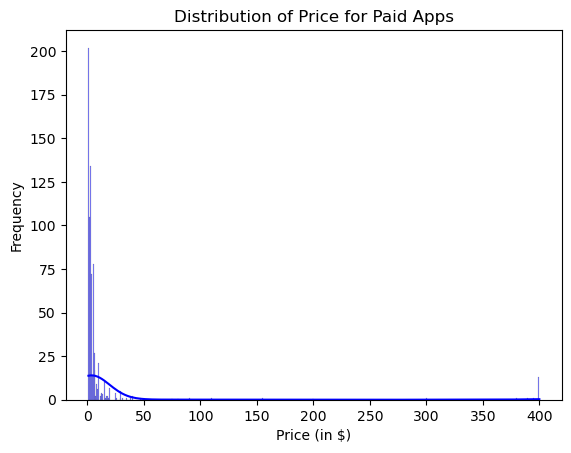

In [93]:
# Create a distribution plot (histogram) for the price of paid apps
sns.histplot(paid_apps['Price'], kde=True, color='blue')

# Set labels and title for the plot
plt.xlabel("Price (in $)")
plt.ylabel("Frequency")
plt.title("Distribution of Price for Paid Apps");

Let's normalize it to plot it better.

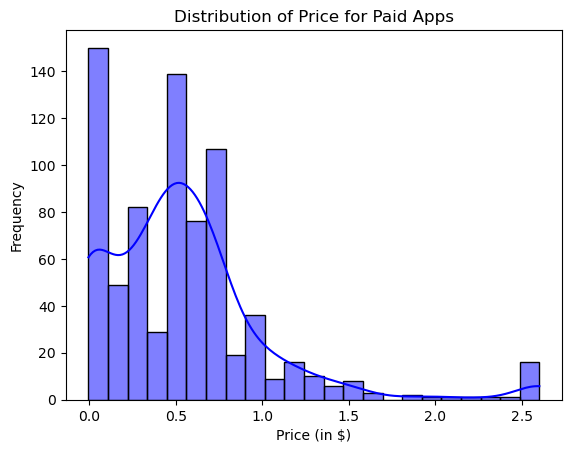

In [94]:
# Create a distribution plot (histogram) for the price of paid apps
sns.histplot(np.log10(paid_apps['Price']), kde=True, color='blue')

# Set labels and title for the plot
plt.xlabel("Price (in $)")
plt.ylabel("Frequency")
plt.title("Distribution of Price for Paid Apps");

We can see that these most expensive apps are outliers in our data, and they have skewed the distribution to the right.

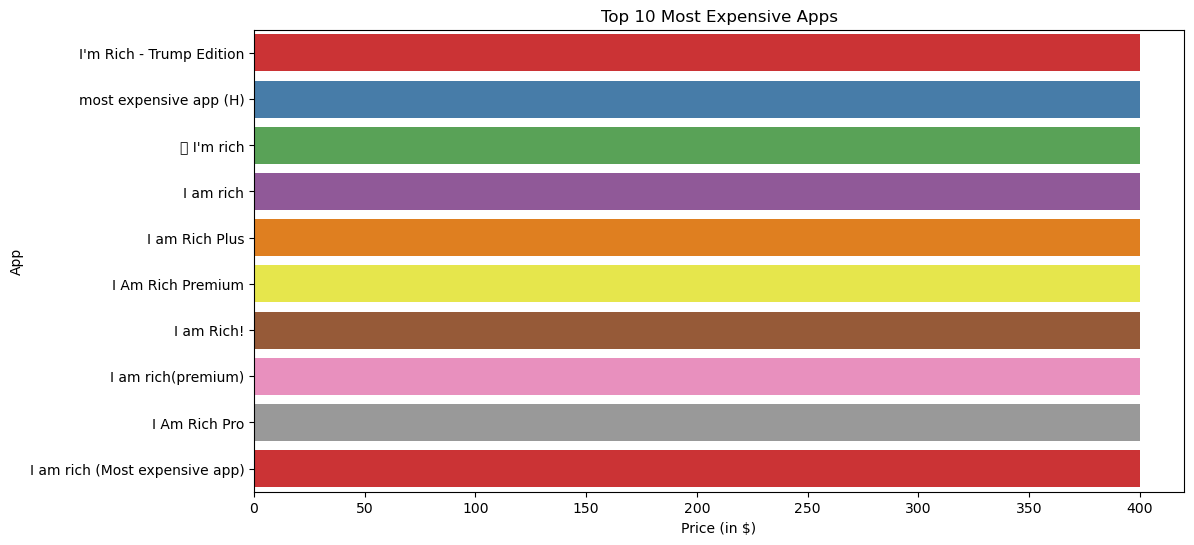

In [95]:
# Sort the DataFrame by 'Price' in descending order and select the top 10
top_10_expensive_apps = paid_apps.nlargest(10, 'Price')

# Create a bar plot for the top 10 most expensive apps
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x='Price', y='App', data=top_10_expensive_apps, palette='Set1')

# Adding labels and title
plt.xlabel("Price (in $)")
plt.ylabel("App")
plt.title("Top 10 Most Expensive Apps");

#### 7. What is the distribution of app sizes (in MB)?

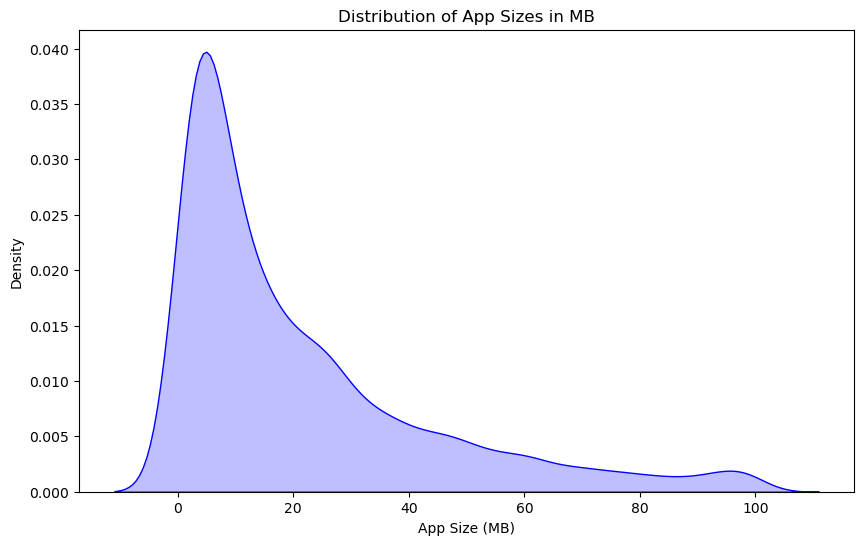

In [96]:
# Create a KDE (Kernel Density Estimate) plot for app sizes
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.kdeplot(df['Size_in_Mb'], shade=True, color='blue')

# Adding labels and title
plt.xlabel("App Size (MB)")
plt.ylabel("Density")
plt.title("Distribution of App Sizes in MB");

We see most of the app sizes are between less than a MB (means in KBs) and 40 MB.

#### 8. How do app sizes vary across different categories?

In [97]:
df.groupby('Category')['Size_in_Mb'].mean()

Category
ART_AND_DESIGN         12.529508
AUTO_AND_VEHICLES      20.036807
BEAUTY                 13.795745
BOOKS_AND_REFERENCE    13.253664
BUSINESS               13.912536
COMICS                 13.484869
COMMUNICATION          11.657320
DATING                 15.825941
EDUCATION              20.076632
ENTERTAINMENT          22.638806
EVENTS                 13.963617
FAMILY                 27.964800
FINANCE                17.937470
FOOD_AND_DRINK         22.056122
GAME                   44.126816
HEALTH_AND_FITNESS     21.642819
HOUSE_AND_HOME         15.970010
LIBRARIES_AND_DEMO     11.216002
LIFESTYLE              14.856415
MAPS_AND_NAVIGATION    16.614368
MEDICAL                19.383059
NEWS_AND_MAGAZINES     12.646415
PARENTING              22.512963
PERSONALIZATION        11.316710
PHOTOGRAPHY            16.831950
PRODUCTIVITY           12.871599
SHOPPING               15.897718
SOCIAL                 16.875621
SPORTS                 24.180992
TOOLS                   8.782017
T

In [98]:
# Check the uniques categories
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [99]:
# Check the number of uniques categories
len(df['Category'].unique())

33

There are 33 unique categories, so it would be hard for us to plot all of them. Let's just plot the top 10 most popular categories.

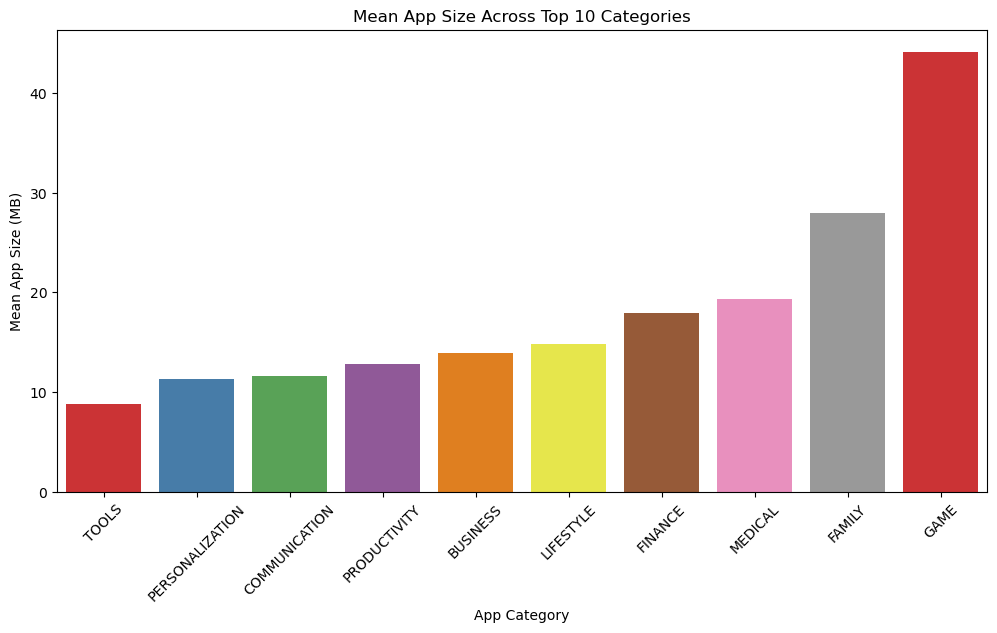

In [100]:
# Find the top 10 popular categories based on the number of apps
top_10_categories = df['Category'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 categories
df_top_10_categories = df[df['Category'].isin(top_10_categories)]

# Calculate the mean app size for each category
mean_sizes = df_top_10_categories.groupby('Category')['Size_in_Mb'].mean().sort_values()

# Create a bar plot to visualize the mean app sizes in the top 10 categories
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=mean_sizes.index, y=mean_sizes.values, palette='Set1')

# Adding labels and title
plt.xlabel("App Category")
plt.ylabel("Mean App Size (MB)")
plt.title("Mean App Size Across Top 10 Categories")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45);

According to this data, games have the highest average size in MBs.

#### 9. What are the most common content ratings for apps in the dataset?

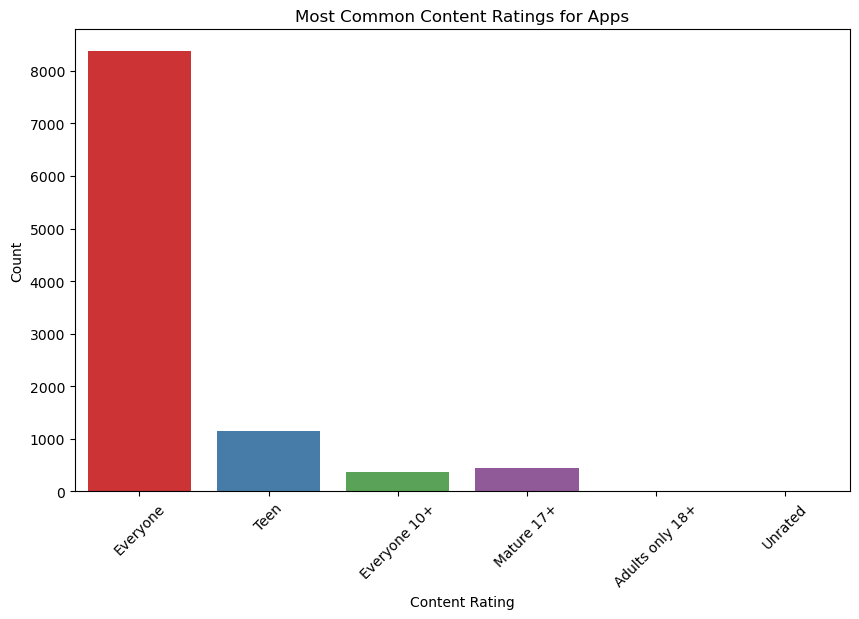

In [101]:
# Create a count plot to visualize the most common content ratings
plt.figure(figsize=(10, 6))  # Set the figure
sns.countplot(x=df['Content Rating'], palette='Set1')

# Adding labels and title
plt.xlabel("Content Rating")
plt.ylabel("Count")
plt.title("Most Common Content Ratings for Apps")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45);

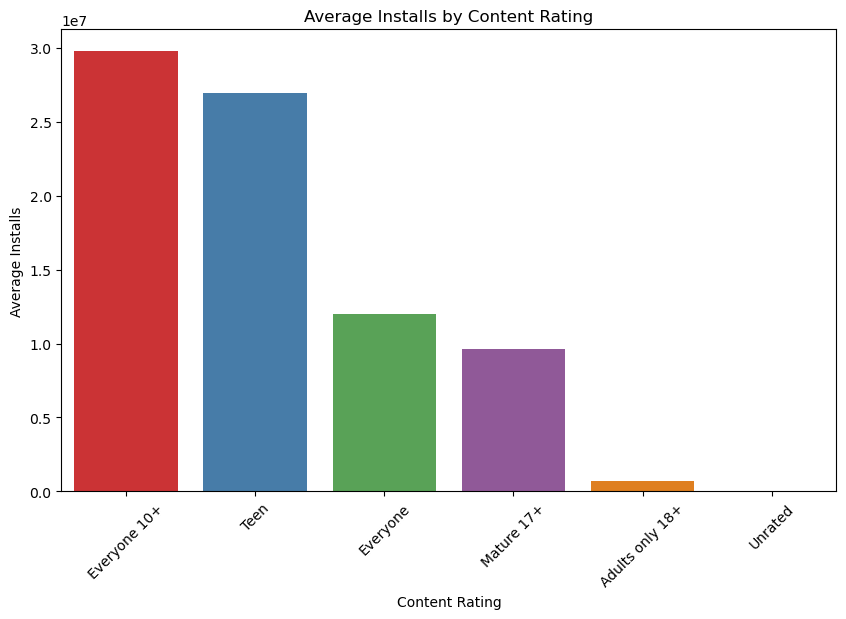

In [102]:
# Group the data by content rating and calculate the mean number of installs for each content rating
content_rating_installs = df.groupby('Content Rating')['Installs'].mean().sort_values(ascending=False)

# Create a bar plot to visualize the average number of installs for each content rating
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=content_rating_installs.index, y=content_rating_installs.values, palette='Set1')

# Adding labels and title
plt.xlabel("Content Rating")
plt.ylabel("Average Installs")
plt.title("Average Installs by Content Rating")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45);

#### 10. What are the most popular app genres?

In [103]:
df['Genres'].value_counts()

Genres
Tools                                840
Entertainment                        587
Education                            526
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: count, Length: 119, dtype: int64

In [104]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [105]:
len(df['Genres'].unique())

119

**Observaions**:
- There are values having multiple genres in them.
- That's why the number of unique genres are 119.

In [106]:
df['Genres'].value_counts().sort_values(ascending=False).head(10)

Genres
Tools              840
Entertainment      587
Education          526
Business           427
Medical            408
Productivity       407
Personalization    386
Lifestyle          372
Communication      366
Sports             364
Name: count, dtype: int64

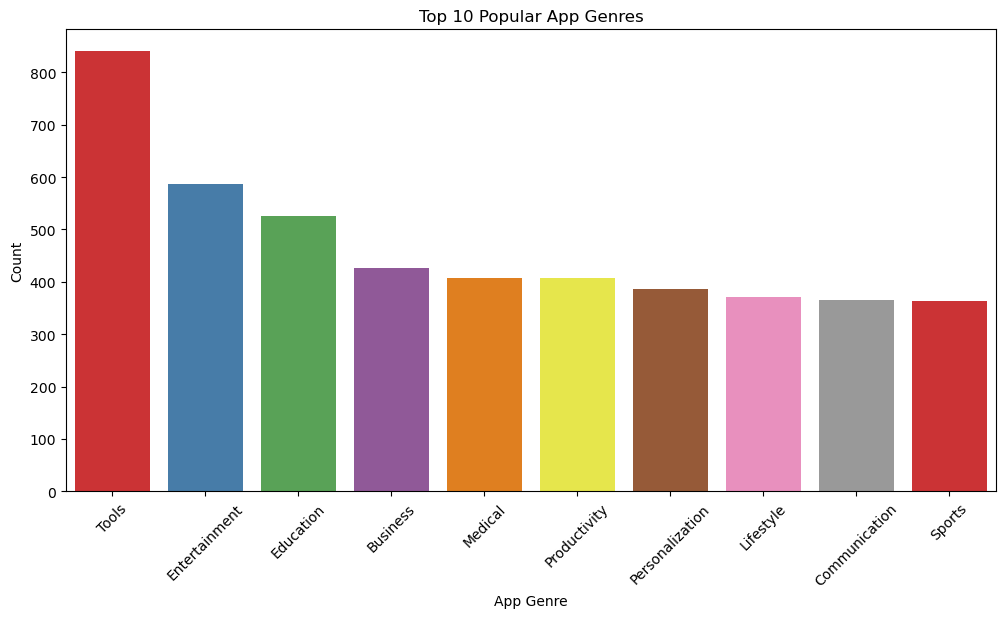

In [107]:
# Select the top 10 popular app genres
top_10_genres = df['Genres'].value_counts().sort_values(ascending=False).head(10)

# Create a bar plot to visualize the top 10 popular app genres
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='Set1')

# Adding labels and title
plt.xlabel("App Genre")
plt.ylabel("Count")
plt.title("Top 10 Popular App Genres")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45);

#### 11. What is the distribution of the number of installs for apps?

Text(0.5, 1.0, 'Distribution of Number of Installs for Apps')

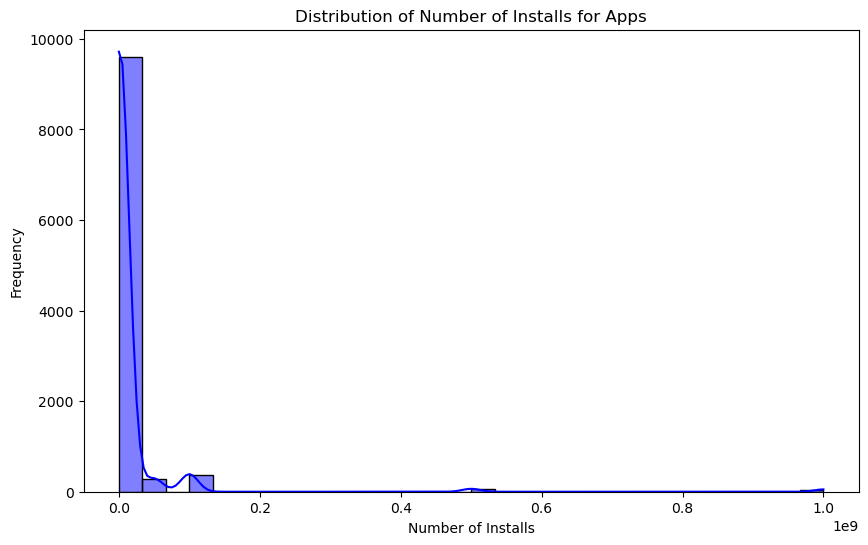

In [108]:
# Create a histogram to visualize the distribution of the number of installs
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(df['Installs'], bins=30, kde=True, color='blue')

# Adding labels and title
plt.xlabel("Number of Installs")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Installs for Apps")

Text(0.5, 1.0, 'Distribution of Number of Installs for Apps')

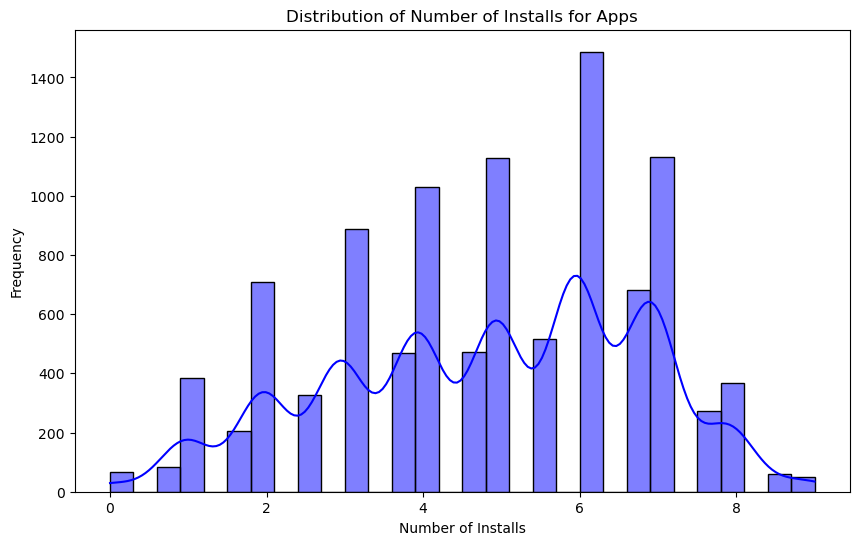

In [109]:
# Create a histogram to visualize the distribution of the number of installs
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(np.log10(df['Installs']), bins=30, kde=True, color='blue')

# Adding labels and title
plt.xlabel("Number of Installs")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Installs for Apps")

#### 12. Which apps have the highest number of installs in each category?

In [110]:
df.groupby('Category')['Installs'].idxmax().sort_values(ascending=False)

Category
PARENTING              7229
FAMILY                 5856
HEALTH_AND_FITNESS     5596
LIFESTYLE              4587
SPORTS                 3953
MAPS_AND_NAVIGATION    3820
NEWS_AND_MAGAZINES     3736
VIDEO_PLAYERS          3665
WEATHER                3626
PRODUCTIVITY           3454
PERSONALIZATION        3354
TOOLS                  3234
TRAVEL_AND_LOCAL       3117
PHOTOGRAPHY            2808
SHOPPING               2655
SOCIAL                 2544
MEDICAL                2310
GAME                   1654
LIBRARIES_AND_DEMO     1523
HOUSE_AND_HOME         1446
FOOD_AND_DRINK         1176
FINANCE                1083
EVENTS                 1005
ENTERTAINMENT           865
EDUCATION               699
DATING                  482
COMMUNICATION           335
COMICS                  297
BUSINESS                194
BOOKS_AND_REFERENCE     152
BEAUTY                  117
AUTO_AND_VEHICLES        72
ART_AND_DESIGN            3
Name: Installs, dtype: int64

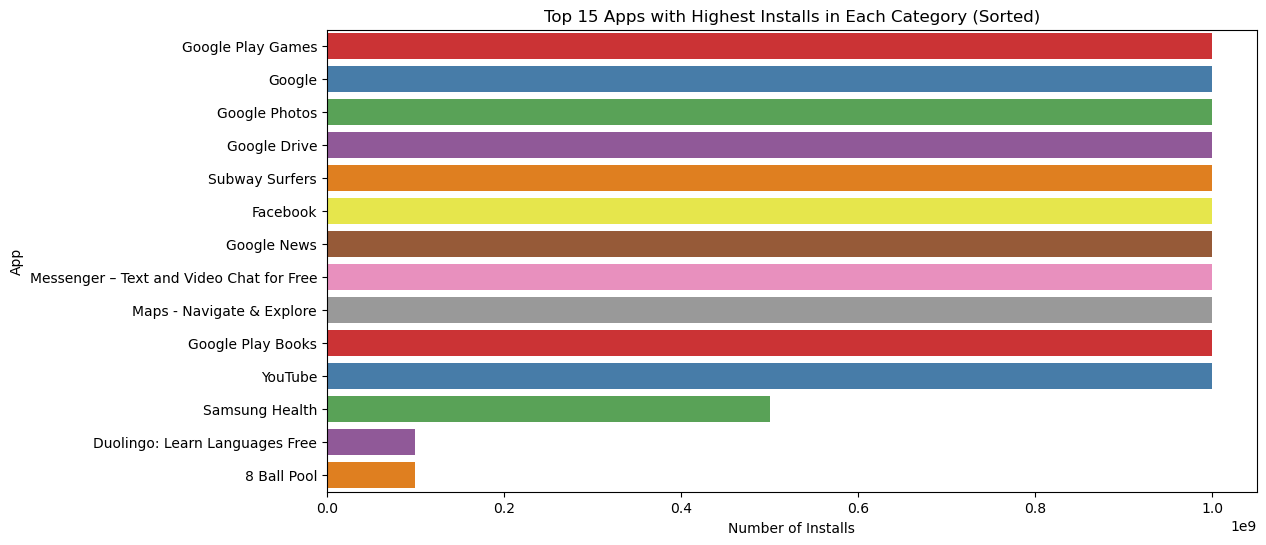

In [111]:
# Group the DataFrame by 'Category' and find the app with the maximum number of installs in each group
apps_with_highest_installs = df.loc[df.groupby('Category')['Installs'].idxmax()]

# Sort the top apps by the number of installs in descending order
top_15_apps = apps_with_highest_installs.sort_values(by='Installs', ascending=False).head(15)

# Create a bar plot to visualize the top 15 apps with the highest installs in each category
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x='Installs', y='App', data=top_15_apps, palette='Set1')

# Adding labels and title
plt.xlabel("Number of Installs")
plt.ylabel("App")
plt.title("Top 15 Apps with Highest Installs in Each Category (Sorted)");

#### 13. Are there any correlations between app category and the number of installs?

In [112]:
df.groupby('Category')['Installs'].mean()

Category
ART_AND_DESIGN         1.942705e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.368858e+06
BUSINESS               2.022634e+06
COMICS                 9.347692e+05
COMMUNICATION          6.598983e+07
DATING                 1.053756e+06
EDUCATION              4.107323e+06
ENTERTAINMENT          2.212306e+07
EVENTS                 2.495806e+05
FAMILY                 5.178769e+06
FINANCE                2.139858e+06
FOOD_AND_DRINK         2.079829e+06
GAME                   2.813918e+07
HEALTH_AND_FITNESS     4.447786e+06
HOUSE_AND_HOME         1.565156e+06
LIBRARIES_AND_DEMO     7.380465e+05
LIFESTYLE              1.433843e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.034416e+05
NEWS_AND_MAGAZINES     2.042886e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.374310e+06
PHOTOGRAPHY            3.019021e+07
PRODUCTIVITY           3.062185e+07
SHOPPING               1.148816e+07
SOCIAL             

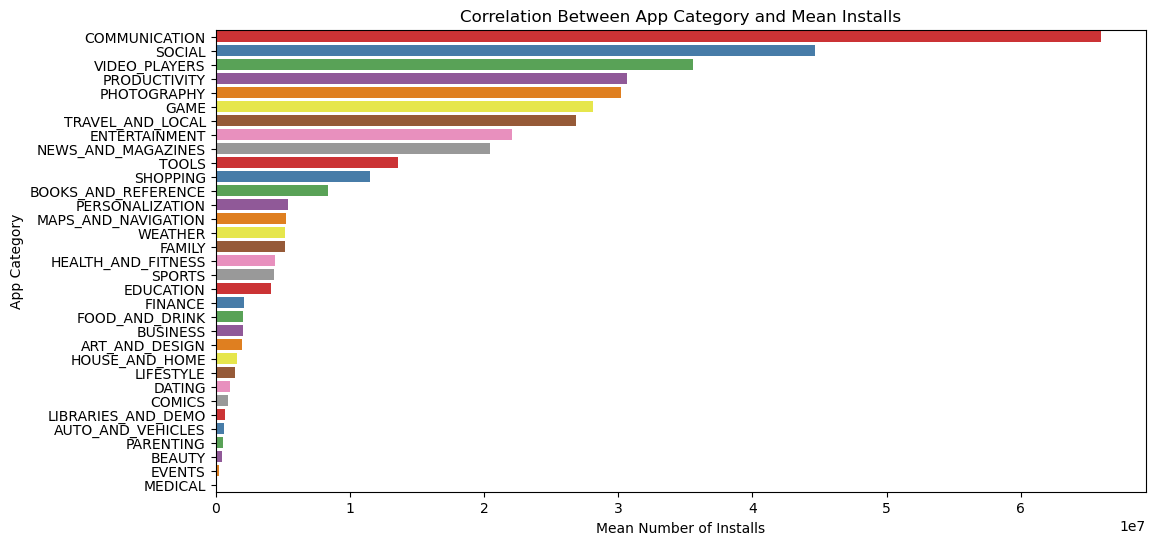

In [113]:
# Calculate the mean number of installs for each app category
correlation = df.groupby('Category')['Installs'].mean().sort_values(ascending=False)

# Create a bar plot to visualize the correlation
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x=correlation.values, y=correlation.index, palette='Set1')

# Adding labels and title
plt.xlabel("Mean Number of Installs")
plt.ylabel("App Category")
plt.title("Correlation Between App Category and Mean Installs");

#### 14. How does app size correlate with the number of installs?

In [114]:
df['Size_in_Mb'].corr(df['Installs'])

0.16880485342823873

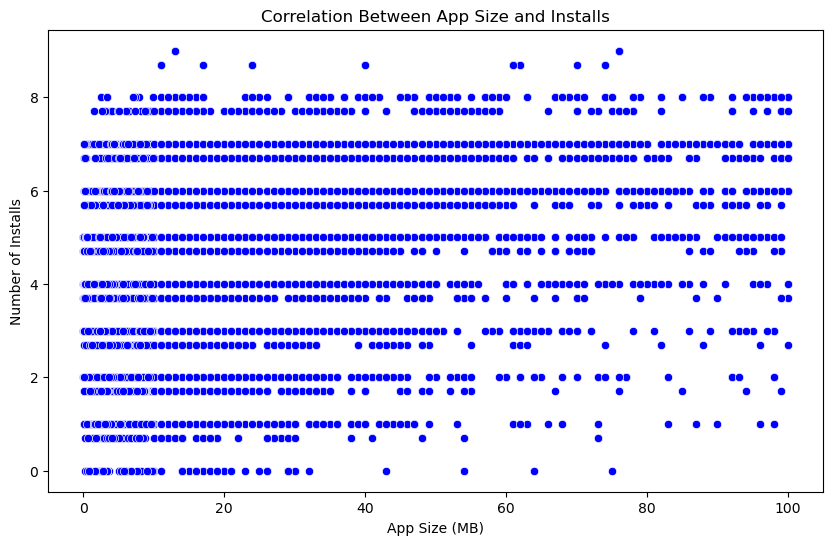

In [115]:
# Create a scatter plot to visualize the correlation between app size and installs
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(data=df, x='Size_in_Mb', y=np.log10(df['Installs']), color='blue')

# Adding labels and title
plt.xlabel("App Size (MB)")
plt.ylabel("Number of Installs")
plt.title("Correlation Between App Size and Installs");

#### 15. Are there any trends in the relationship between app rating and content rating?

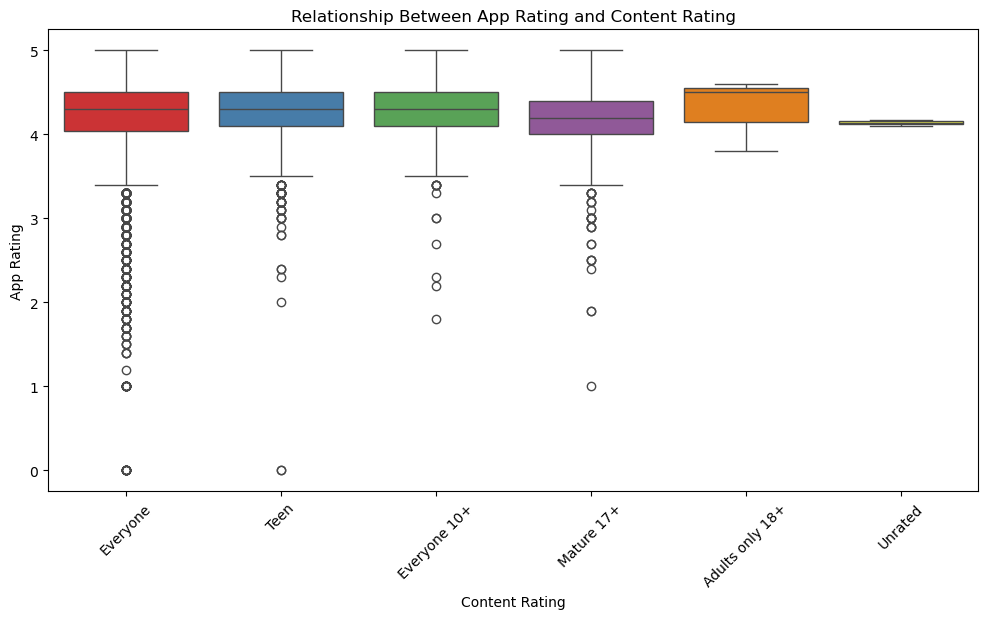

In [116]:
# Create a box plot or violin plot to visualize the relationship between app rating and content rating
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Box plot
sns.boxplot(data=df, x='Content Rating', y='Rating', palette='Set1')

# Or, we can use a violin plot for a more detailed view
# sns.violinplot(data=df, x='Content Rating', y='Rating', palette='Set3', inner='quartile')

# Adding labels and title
plt.xlabel("Content Rating")
plt.ylabel("App Rating")
plt.title("Relationship Between App Rating and Content Rating")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45);

#### 16. How many apps fall into each "Installs_category"?

In [117]:
df['Installs_category'].value_counts()

Installs_category
Low                   2129
High                  2003
Very High             1815
More than moderate    1602
Moderate              1499
Top Notch              751
Very low               533
no                      14
Name: count, dtype: int64

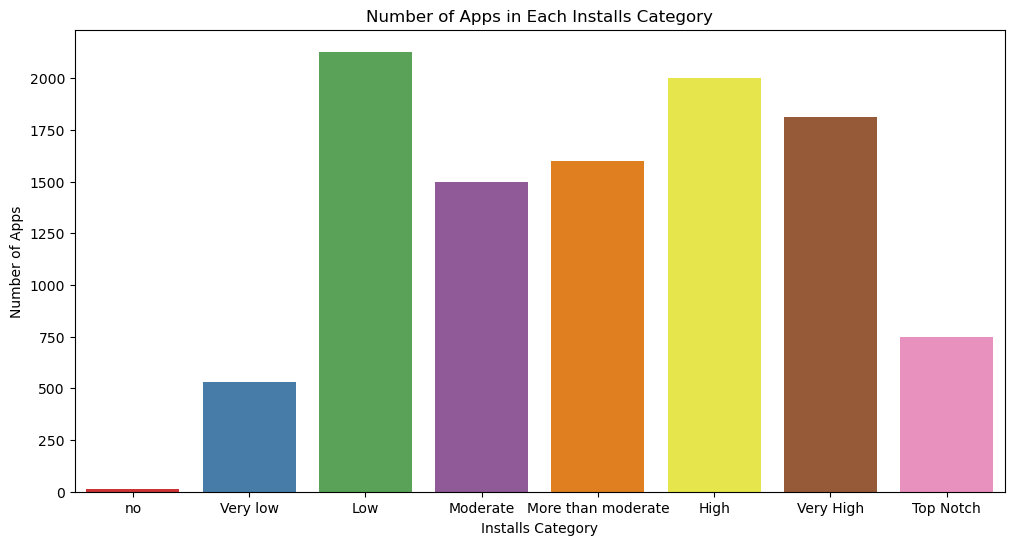

In [118]:
# Create a countplot to visualize the number of apps in each Installs_category
plt.figure(figsize=(12, 6))  # Set the figure size
sns.countplot(data=df, x='Installs_category', palette='Set1')

# Adding labels and title
plt.xlabel("Installs Category")
plt.ylabel("Number of Apps")
plt.title("Number of Apps in Each Installs Category");

#### 17. Can we identify any outliers in the dataset?

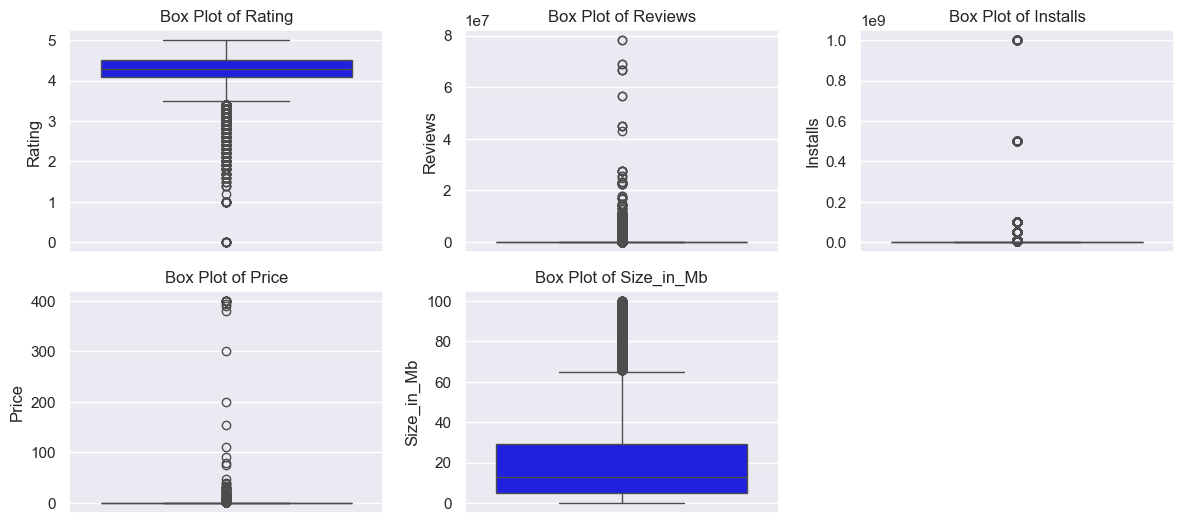

In [119]:
# Select only numerical columns for box plots
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Create a grid of box plots for numerical columns
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.set(style="darkgrid")  # Set the style of the plots

# Iterate through each numerical column and create a box plot
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(3, 3, i + 1)  # Change the subplot layout as needed
    sns.boxplot(data=numerical_columns, y=column, color='blue')
    plt.title(f'Box Plot of {column}')

# Adjust the layout of subplots
plt.tight_layout();

Let's normalize it to visualize it better.

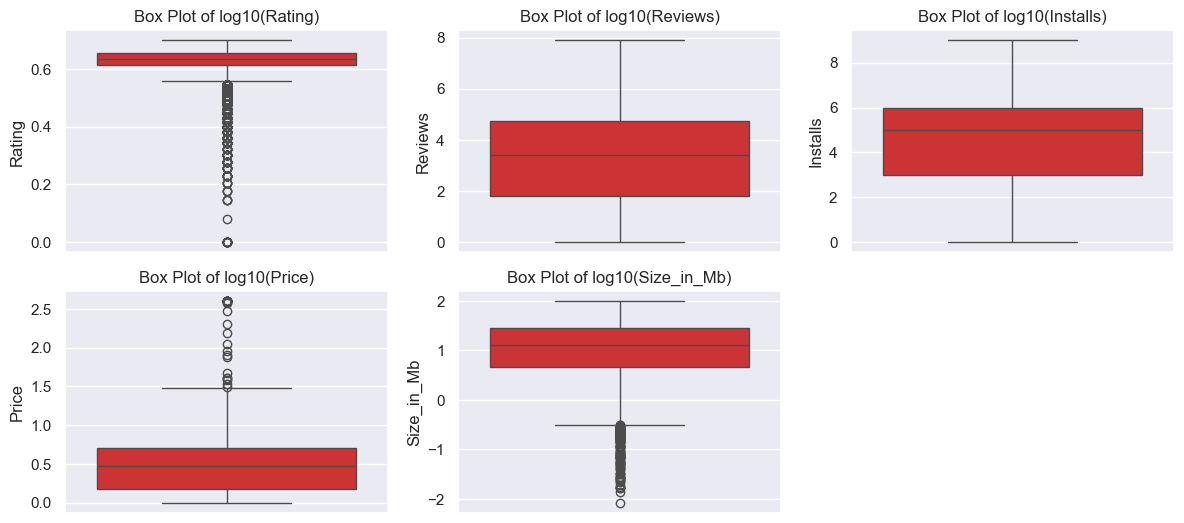

In [120]:
# Apply log10 transformation to the numerical columns
numerical_columns_log = np.log10(numerical_columns)

# Create a grid of box plots for log-transformed numerical columns
plt.figure(figsize=(12, 8))  # Set the figure size
sns.set(style="darkgrid")  # Set the style of the plots

# Iterate through each log-transformed numerical column and create a box plot
for i, column in enumerate(numerical_columns_log.columns):
    plt.subplot(3, 3, i + 1)  # Change the subplot layout as needed
    sns.boxplot(data=numerical_columns_log, y=column, palette='Set1')
    plt.title(f'Box Plot of log10({column})')

# Adjust the layout of subplots
plt.tight_layout()

As we see, there are some outliers in the `Rating`, `Price`, and `Size_in_Mb` columns even after normalizing the data using log10. So we will have to deal with them.